### 2.1 데이터 전처리 기초

#### missingno 패키지

In [28]:
from io import StringIO
csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df= pd.read_csv(csv_data, dtype={'x1':pd.Int64Dtype()}, parse_dates = [3])
df

x1   x2   x3         x4 x5
0    1  0.1  1.0 2019-01-01  A
1    2  NaN  NaN 2019-01-02  B
2    3  NaN  3.0 2019-01-03  C
3  NaN  0.4  4.0 2019-01-04  A
4    5  0.5  5.0 2019-01-05  B
5  NaN  NaN  NaN 2019-01-06  C
6    7  0.7  7.0        NaT  A
7    8  0.8  8.0 2019-01-08  B
8    9  0.9  NaN 2019-01-09  C

In [29]:
# isnull, isna 로 결측데이터의 위치 확인

In [30]:
df.isnull() # null 값이 True

x1     x2     x3     x4     x5
0  False  False  False  False  False
1  False   True   True  False  False
2  False   True  False  False  False
3   True  False  False  False  False
4  False  False  False  False  False
5   True   True   True  False  False
6  False  False  False   True  False
7  False  False  False  False  False
8  False  False   True  False  False

In [31]:
df.isna() # null값이 True

x1     x2     x3     x4     x5
0  False  False  False  False  False
1  False   True   True  False  False
2  False   True  False  False  False
3   True  False  False  False  False
4  False  False  False  False  False
5   True   True   True  False  False
6  False  False  False   True  False
7  False  False  False  False  False
8  False  False   True  False  False

In [32]:
df.isnull().sum() # True값을 더하여, 결측치 갯수 확인

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [33]:
import missingno as msno
# matrix 함수로 결측치의 위치에 대한 시각화
# 맨 오른쪽은 스파크라인으로 각행의 데이터 완성도를 표현
msno.matrix(df)
plt.show()

In [34]:
# bar를 사용하여 결측데이터의 양을 표현
msno.bar(df)
plt.show()

In [50]:
# 타이타닉 데이터로 확인하기
titanic = sns.load_dataset('titanic')
titanic.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

In [36]:
# missingno로 데이터 확인
msno.matrix(titanic)
plt.show()

In [39]:
# 결측 데이터 처리 방법 (삭제)
df.dropna() # 결측 데이터가 있는 모든 행을 삭제

x1   x2   x3         x4 x5
0   1  0.1  1.0 2019-01-01  A
4   5  0.5  5.0 2019-01-05  B
7   8  0.8  8.0 2019-01-08  B

In [40]:
df.dropna(axis = 1) # axis = 1결측 데이터가 있는 모든 열을 삭제

x5
0  A
1  B
2  C
3  A
4  B
5  C
6  A
7  B
8  C

In [41]:
df.dropna(thresh=7, axis=1) # thresh 의 갯수 이상의 비결측 데이터가 있는 행 or 열만 남김

x1         x4 x5
0    1 2019-01-01  A
1    2 2019-01-02  B
2    3 2019-01-03  C
3  NaN 2019-01-04  A
4    5 2019-01-05  B
5  NaN 2019-01-06  C
6    7        NaT  A
7    8 2019-01-08  B
8    9 2019-01-09  C

In [51]:
# 타이타닉 데이터에서 결측데이터 삭제
# 데이터가 절반 이상이 없는 열을 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)
plt.show()

In [54]:
# 결측데이터의 대체 (대체값 사용)
# SimpleImputer 클래스 객체 생성, strategy 인수는 mean(평균), median(중앙), most_frequent(최빈)으로 대체
# fit_transform을 사용하여 채워진 데이터프레임 생성

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
df

x1   x2 x3         x4 x5
0  1  0.1  1 2019-01-01  A
1  2  0.1  1 2019-01-02  B
2  3  0.1  3 2019-01-03  C
3  1  0.4  4 2019-01-04  A
4  5  0.5  5 2019-01-05  B
5  1  0.1  1 2019-01-06  C
6  7  0.7  7 2019-01-01  A
7  8  0.8  8 2019-01-08  B
8  9  0.9  1 2019-01-09  C

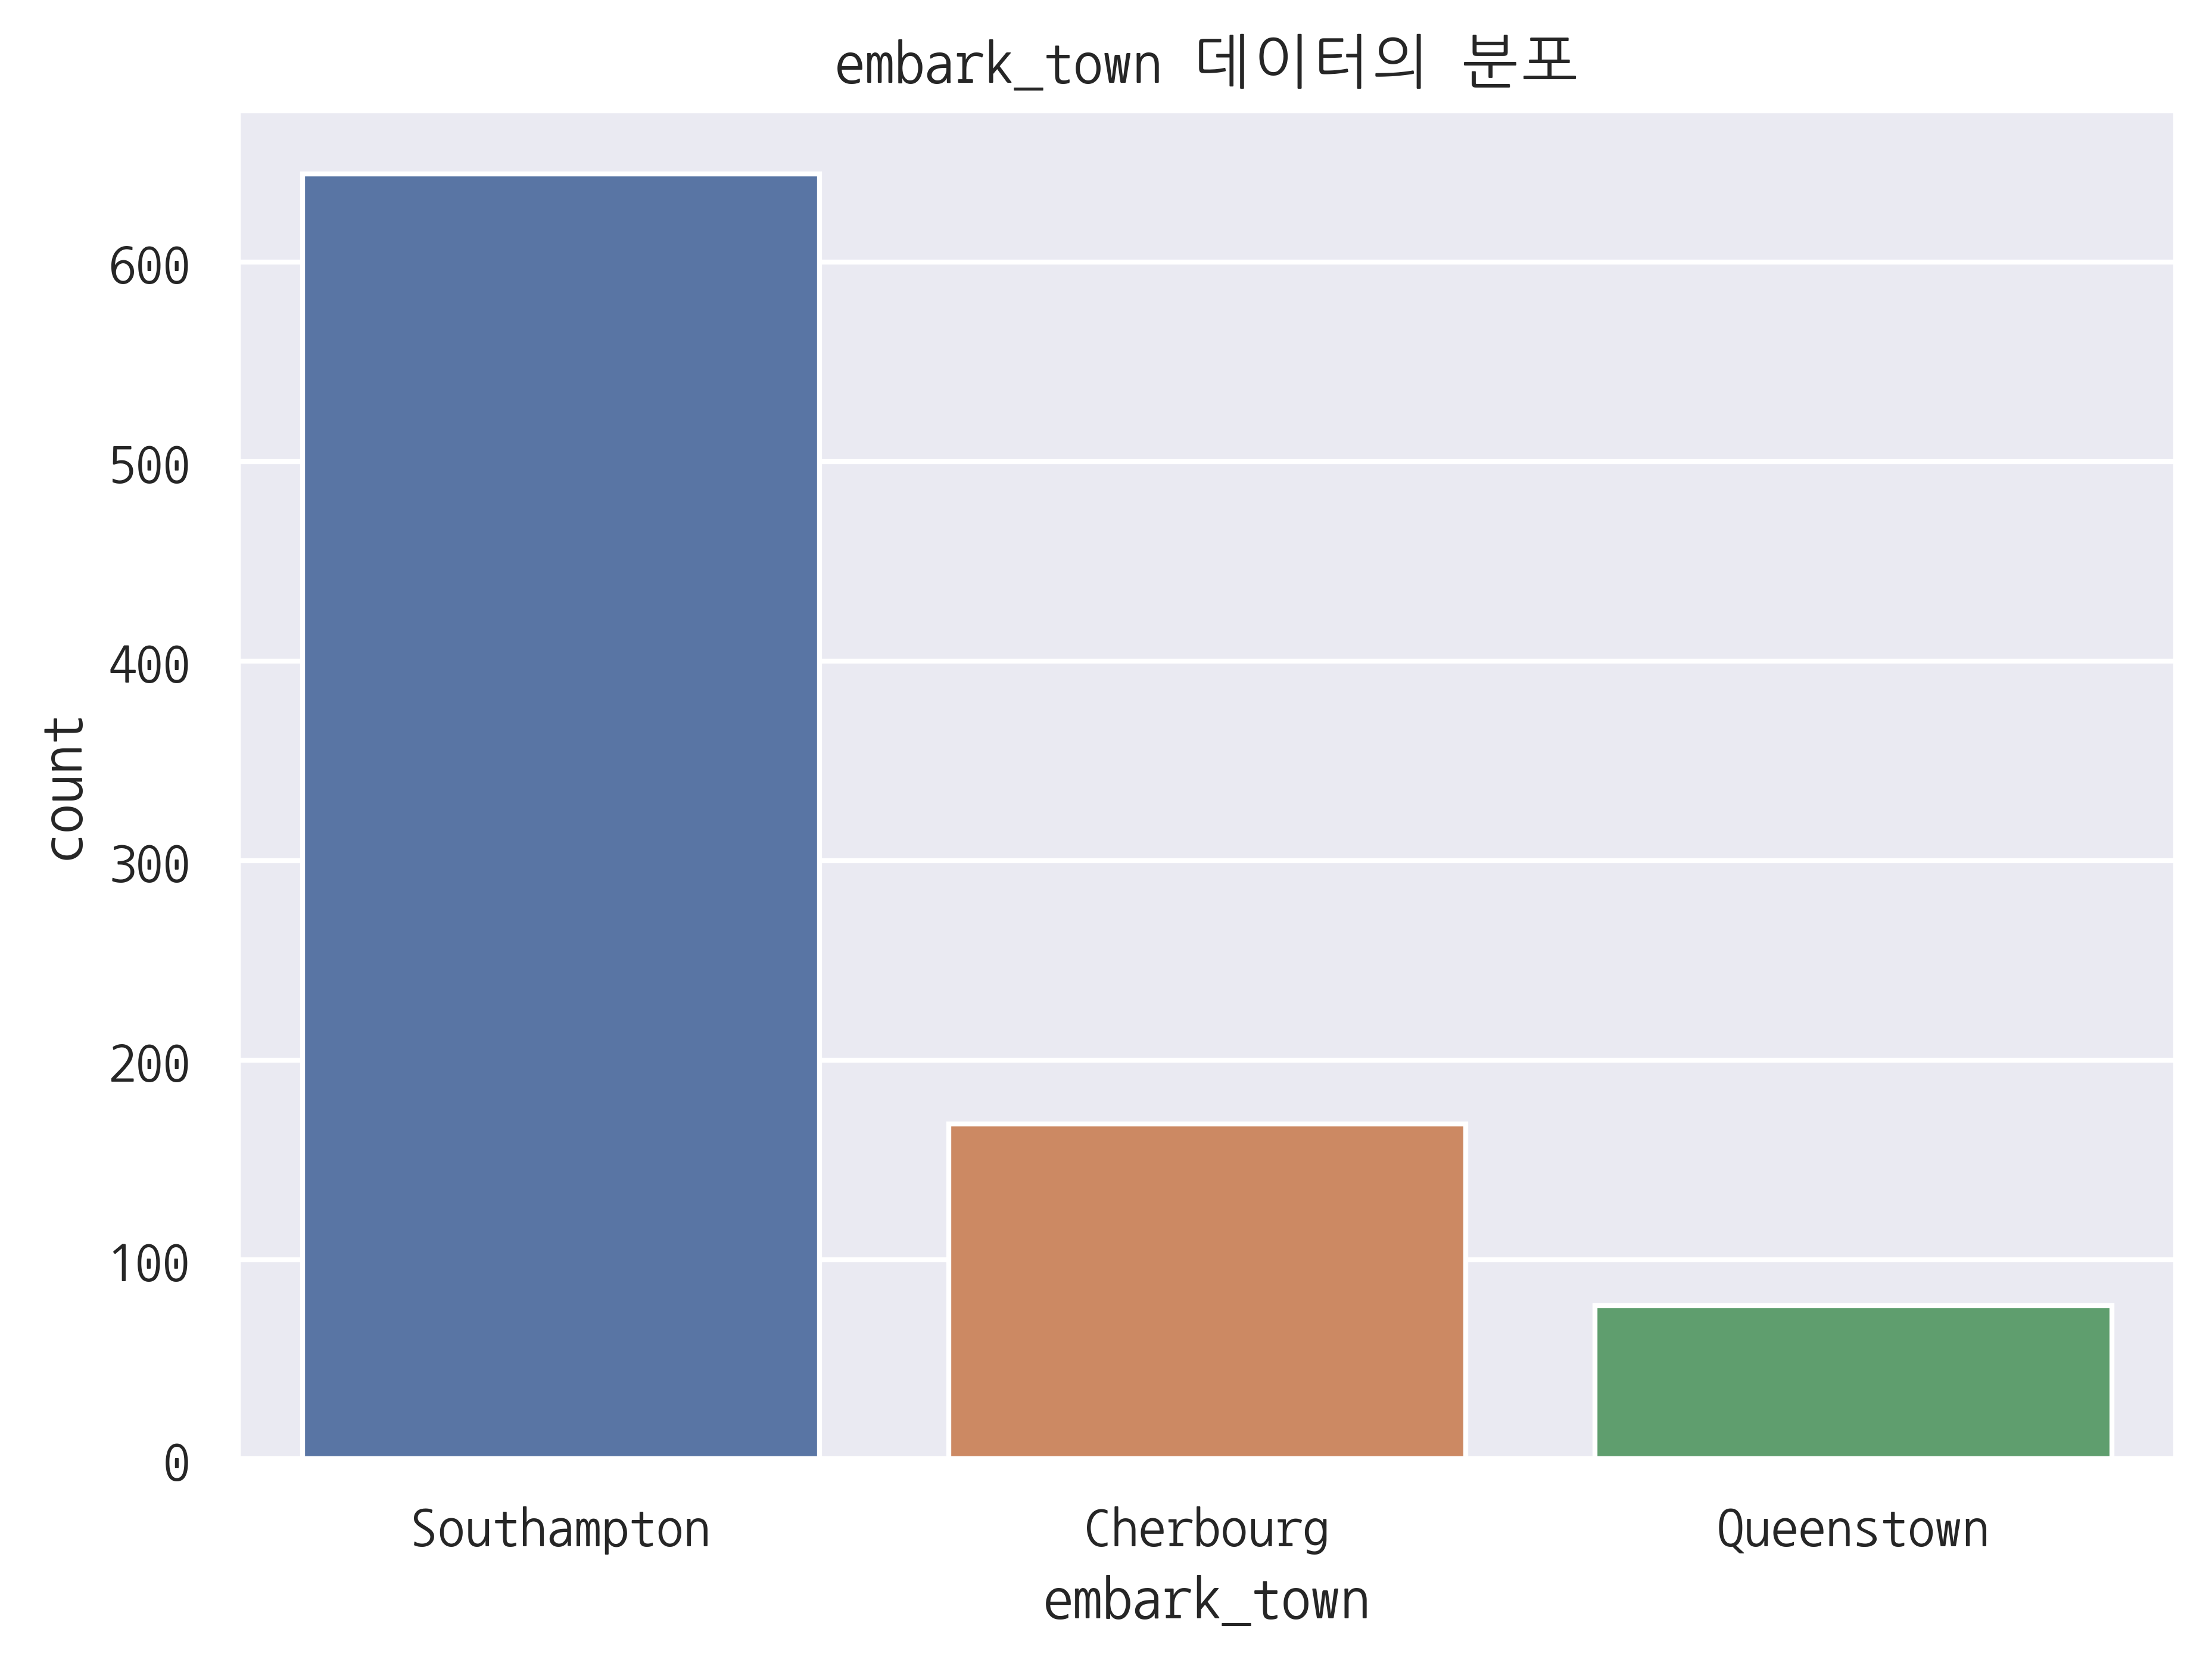

In [55]:
# 타이타닉의 embark_towm 데이터 대체
sns.countplot(titanic.embark_town)
plt.title('embark_town 데이터의 분포')
plt.show()

In [60]:
# SimpleImupter로 대체
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent") # imputer_embark_town 이라는 객체를 최빈값으로 생성
titanic['embark_town'] = imputer_embark_town.fit_transform(titanic[['embark_town']]) #embark_town의 결측치를 최빈값으로 대체 fit뒤에 컬럼을 df형식으로 마스킹한것에 주의
titanic['embarked'] = imputer_embark_town.fit_transform(titanic[['embarked']]) # embarked 의 결측치를 최빈값으로 대체 fit뒤에 컬럼을 df형식으로 마스킹한것에 주의
msno.matrix(titanic) # missigno로 결측치가채워졌는지 확인
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


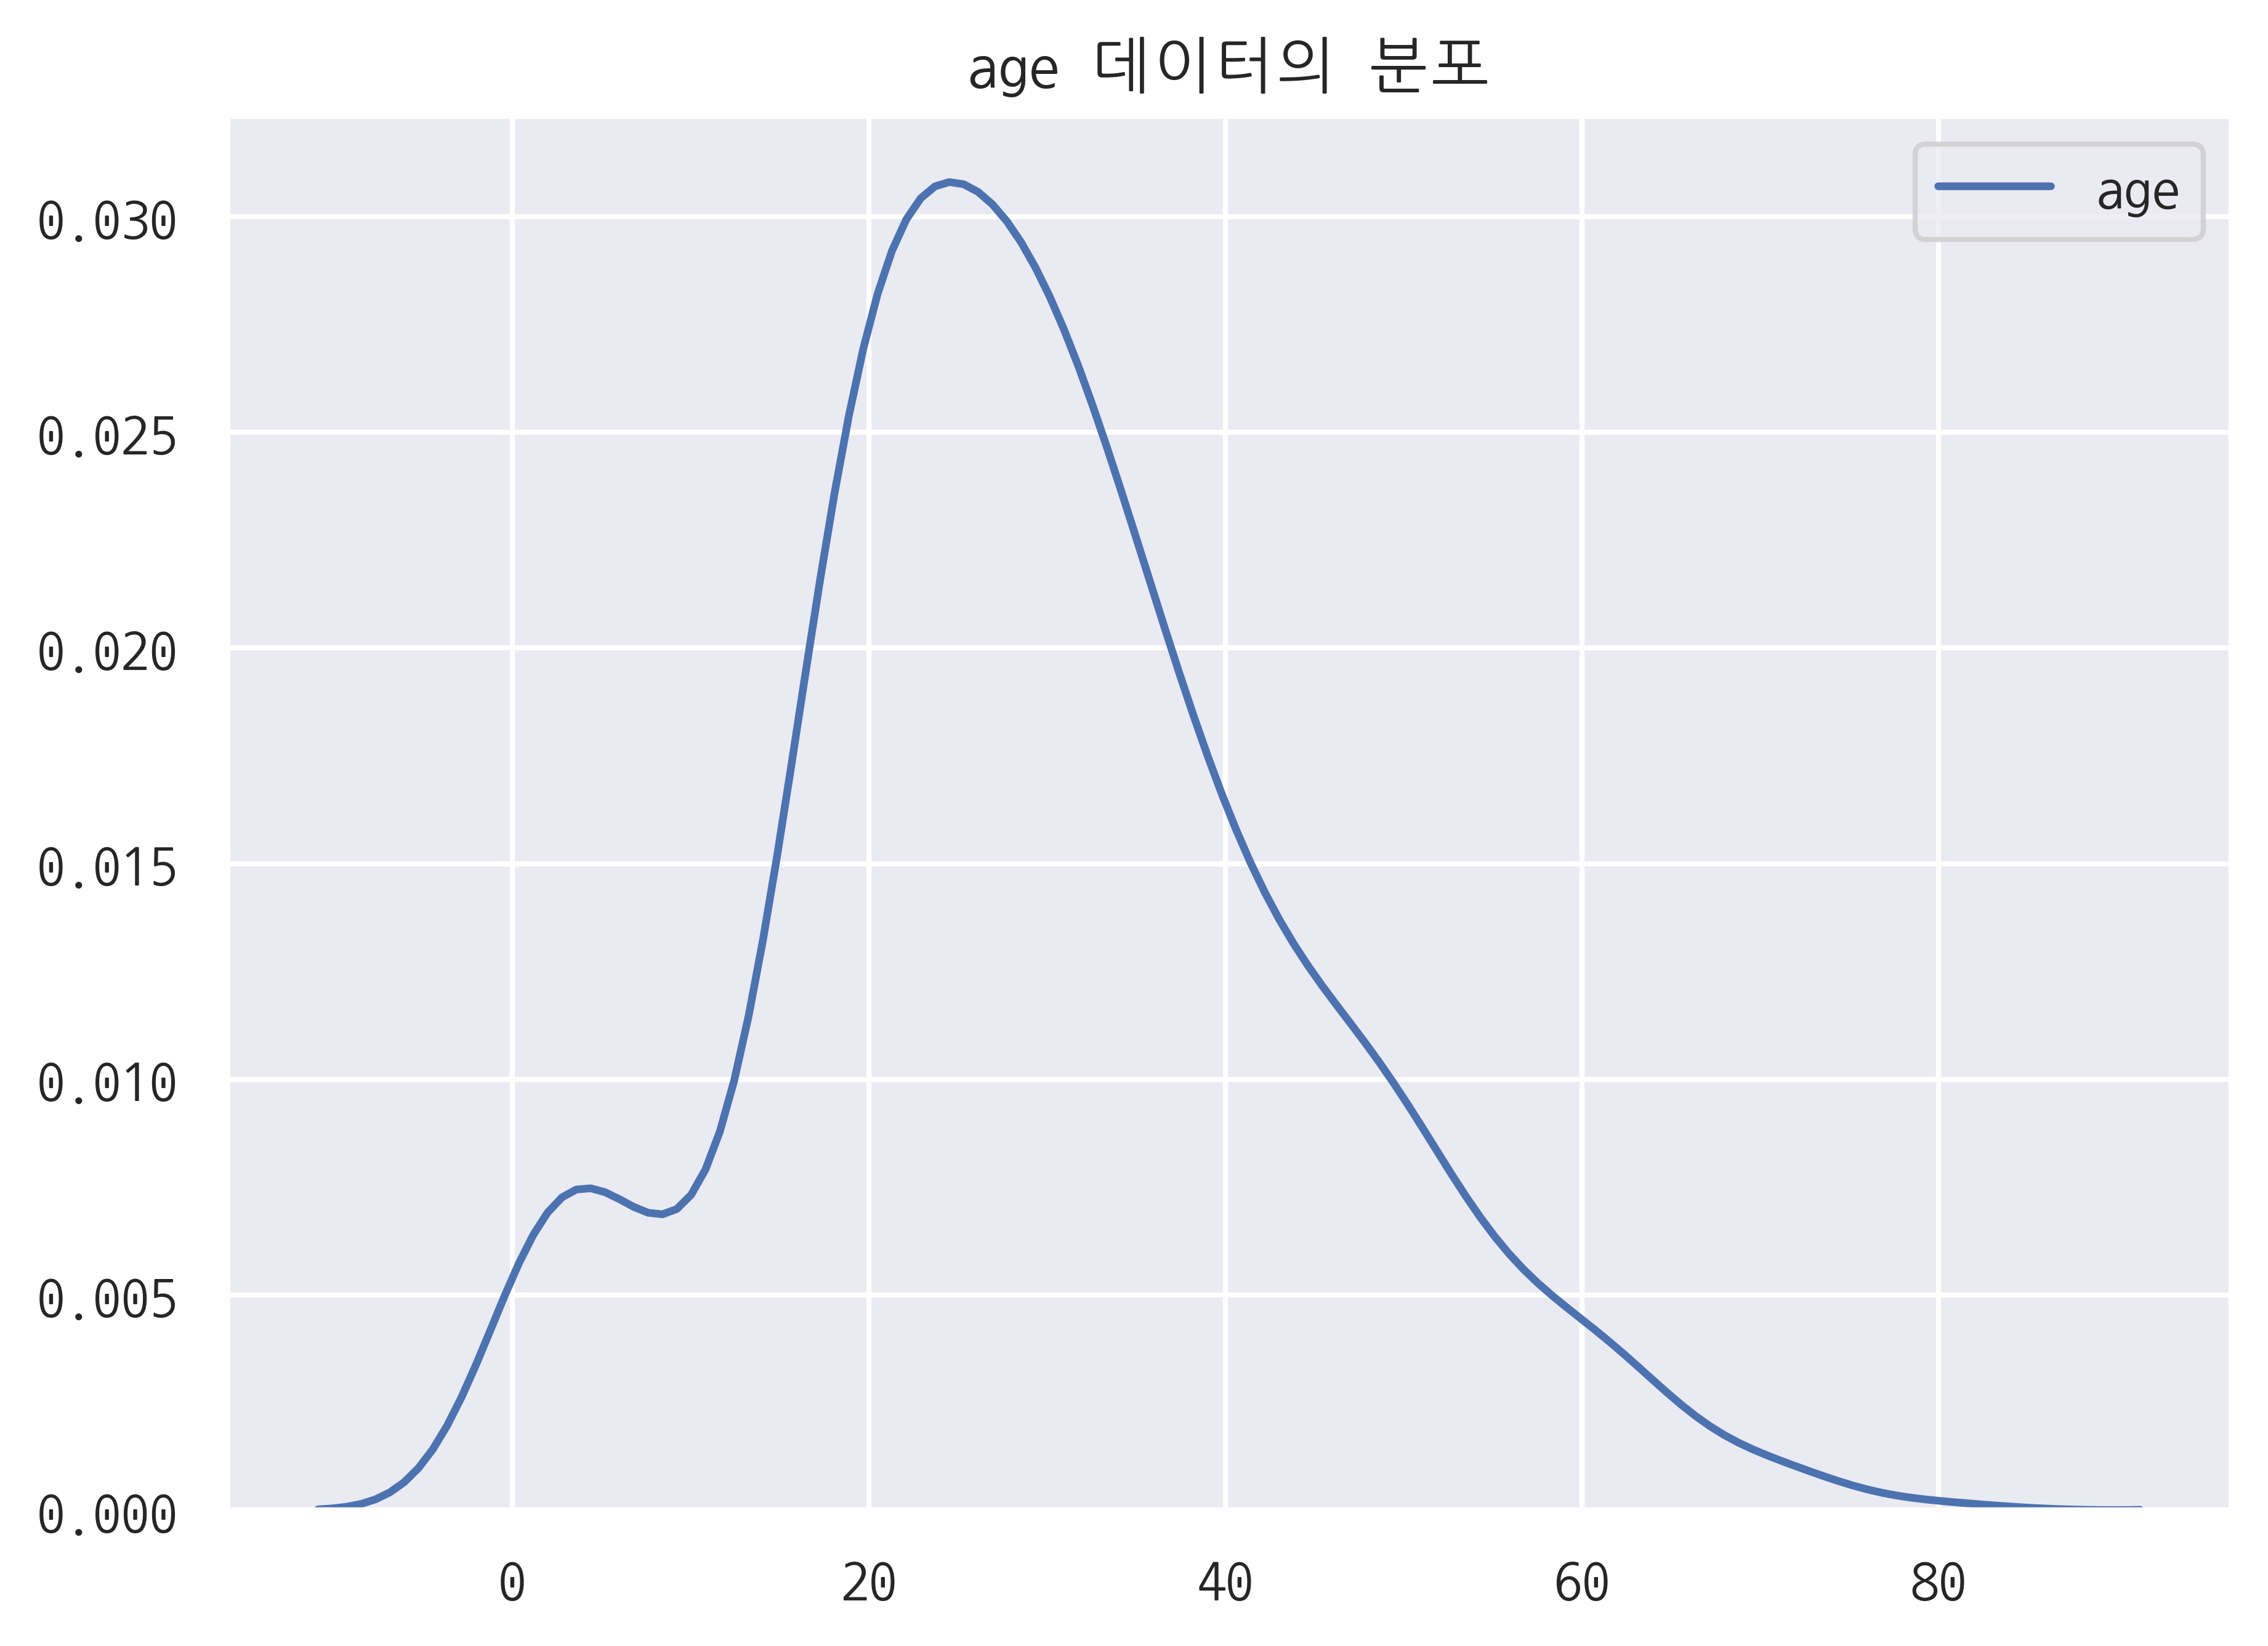

In [61]:
# age 컬럼 대체
sns.kdeplot(titanic.age)
plt.title('age 데이터의 분포')
plt.show()

In [63]:
# 중앙값으로 대체 하기
imputer_age = SimpleImputer(strategy='median')
titanic['age'] = imputer_age.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

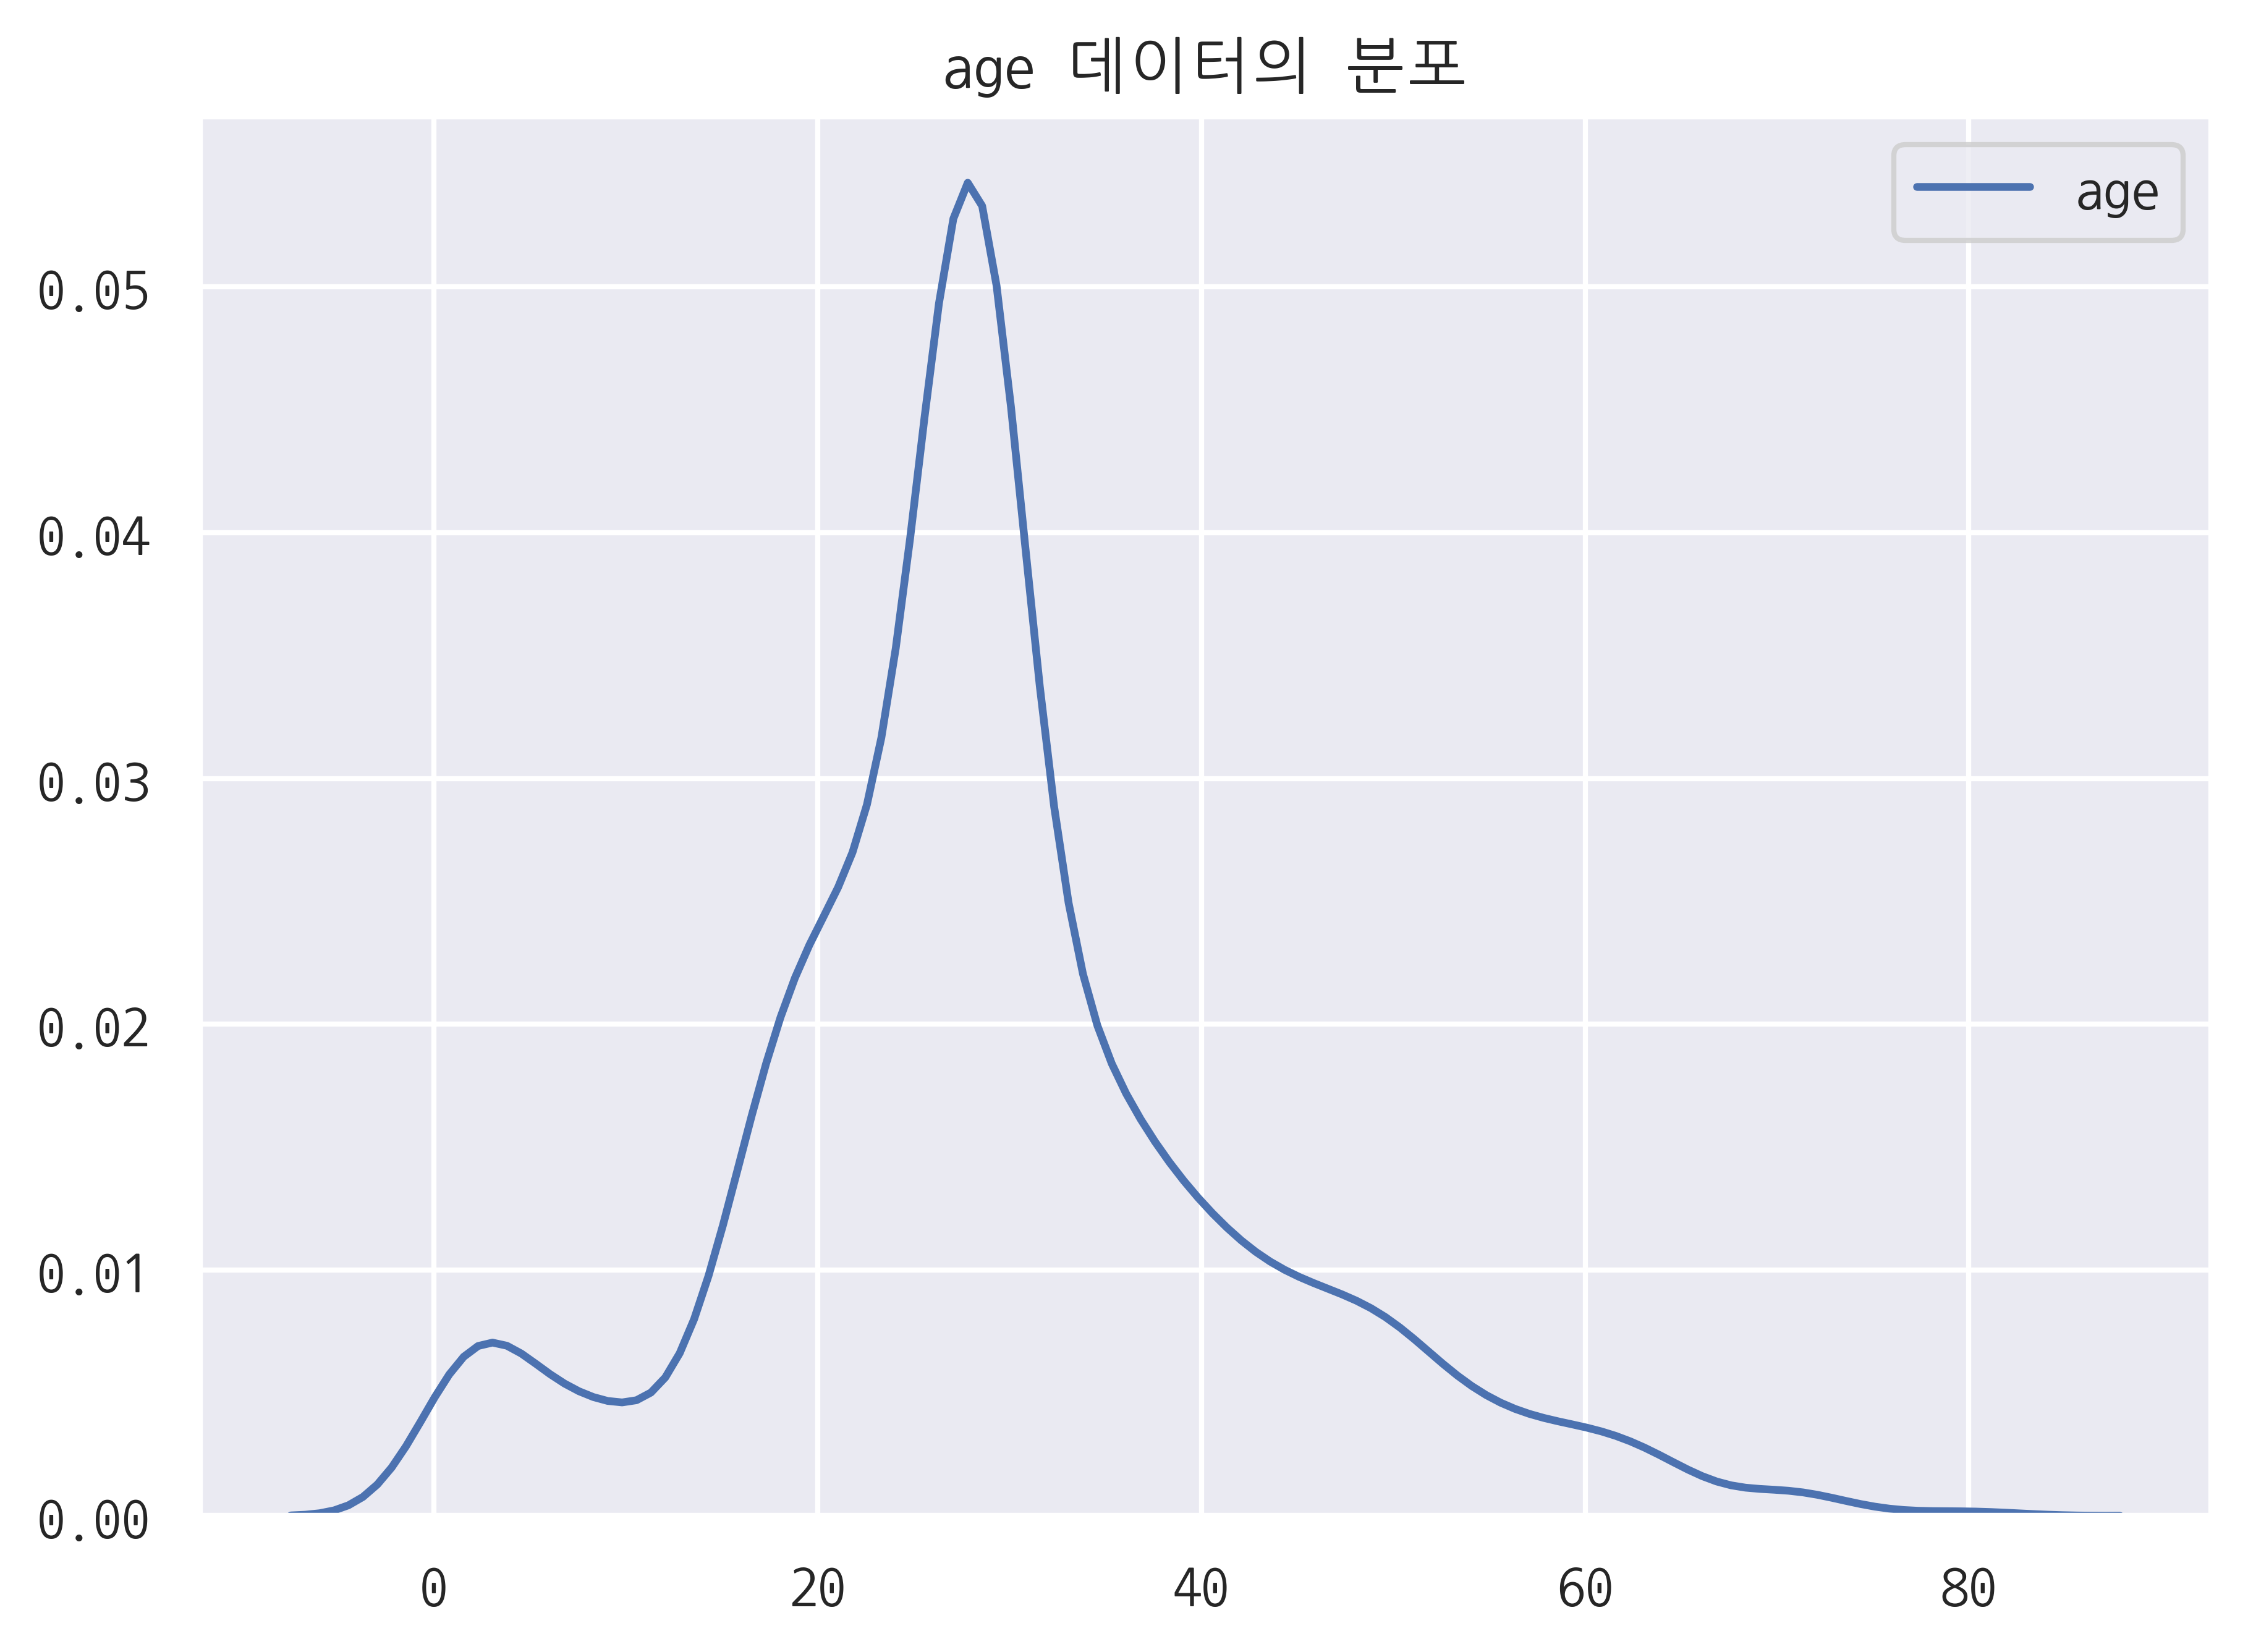

In [64]:
sns.kdeplot(titanic.age)
plt.title('age 데이터의 분포')
plt.show()

In [1]:
# patsy

In [66]:
# demo_data로 난수의 df을 생성
from patsy import demo_data
df = pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))
df

x1        x2        x3        x4        x5
0  1.764052 -0.977278  0.144044  0.333674 -2.552990
1  0.400157  0.950088  1.454274  1.494079  0.653619
2  0.978738 -0.151357  0.761038 -0.205158  0.864436
3  2.240893 -0.103219  0.121675  0.313068 -0.742165
4  1.867558  0.410599  0.443863 -0.854096  2.269755

In [67]:
# dmatrx함수 사용
from patsy import dmatrix

dmatrix('x1 + 0', data = df) # df의 data에서 x1의 데이터만 추출

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [69]:
dmatrix('x1 + x2 + x3 + 0', data = df) # df의 data에서 x1,x2,x3의 데이터만 추출

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [70]:
# + 0 은 상수항을 넣지말라는 의미, 없다면 자동으로 intercept란 이름의 상수항을 추가
dmatrix('x1 + x2 + x3', data = df) 

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [73]:
# - 1 도 + 0과 같은 의미(상수항 만들지말아라)
dmatrix('x1 + x2 + x3 - 1', data = df) 

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [76]:
# 변수를 다른 값으로 만드는 수학 변환 가능
dmatrix('x1 + np.log(np.abs(x2))', data = df) 

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [78]:
# 정의 함수도 사용가능

def ten_times(x):
    return 10 * x

dmatrix('ten_times(x1)', data = df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

In [79]:
# 두 변수를 곱해서 새로운 변수를 만드는 상호작용도 가능
dmatrix('x1 + x2 + x1:x2+0', data = df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [81]:
# 두변수의 상호작용을 한번에 표시
dmatrix('x1 * x2 + 0', df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [82]:
# 상호작용을 제외한 다른 연산자는 I()를 사용함
dmatrix('x1 + x2 + I(x1+x2)+0', data = df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

In [84]:
# scaling 작업
# center() : 평균을 0으로 스케일링
# standardize() : 평균을 0으로하고 표준편차를 1로 스케일링
# scale() : stanardize()와 같음
dm = dmatrix('center(x1) +0', data = df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [85]:
# 위의 변환 연산은 x1 데이터에서 x1의 평균을 빼는것과 같음
df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

In [86]:
# 평균값은 design_info에 저장
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

In [2]:
from patsy import dmatrix
titanic = sns.load_dataset("titanic")
titanic.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

In [3]:
# 보고싶은 컬럼만 가져올수 있음
dmatrix('survived + pclass + age + 0', data = titanic)

DesignMatrix with shape (714, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         0       3   31
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       1   19
         0       1   40
         0       2   66
         0       1   28
         0       1   42
         0       3   21
         0       3   18
  [684 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

#### sklearn.preprocessing의 패키지

In [90]:
X = np.arange(7).reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [91]:
# 평균0, 표준편차 1의 데이터로 바꿔줌
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [92]:
# 아웃라이어가 있을 경우
X2 = np.vstack([X, [1000]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [94]:
# 아웃라이어 때문에 모든값이 이상하게 변함 (-0.38 주변에 분포)
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [96]:
# 아웃라이어가 있을때는 RobustScaler 클래스로 변환한다. (중앙값이0, IQR은 1), 대부분 데이터가 0 주변으로 변경
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [99]:
# PolynomialFeatures 입력데이터를 다항식으로 변환 (상수항, x, x^2 ...)
# degree = 차수
# include_bias : 상수항 생성 여부
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [106]:
# FunctionTransformer 사용자가 지정한 함수를 사용하여 입력값 x를 변환
# 아래는 삼각함수임, 따라서 0 = 360 이어야함

X = 90 * np.arange(9).reshape(-1,1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


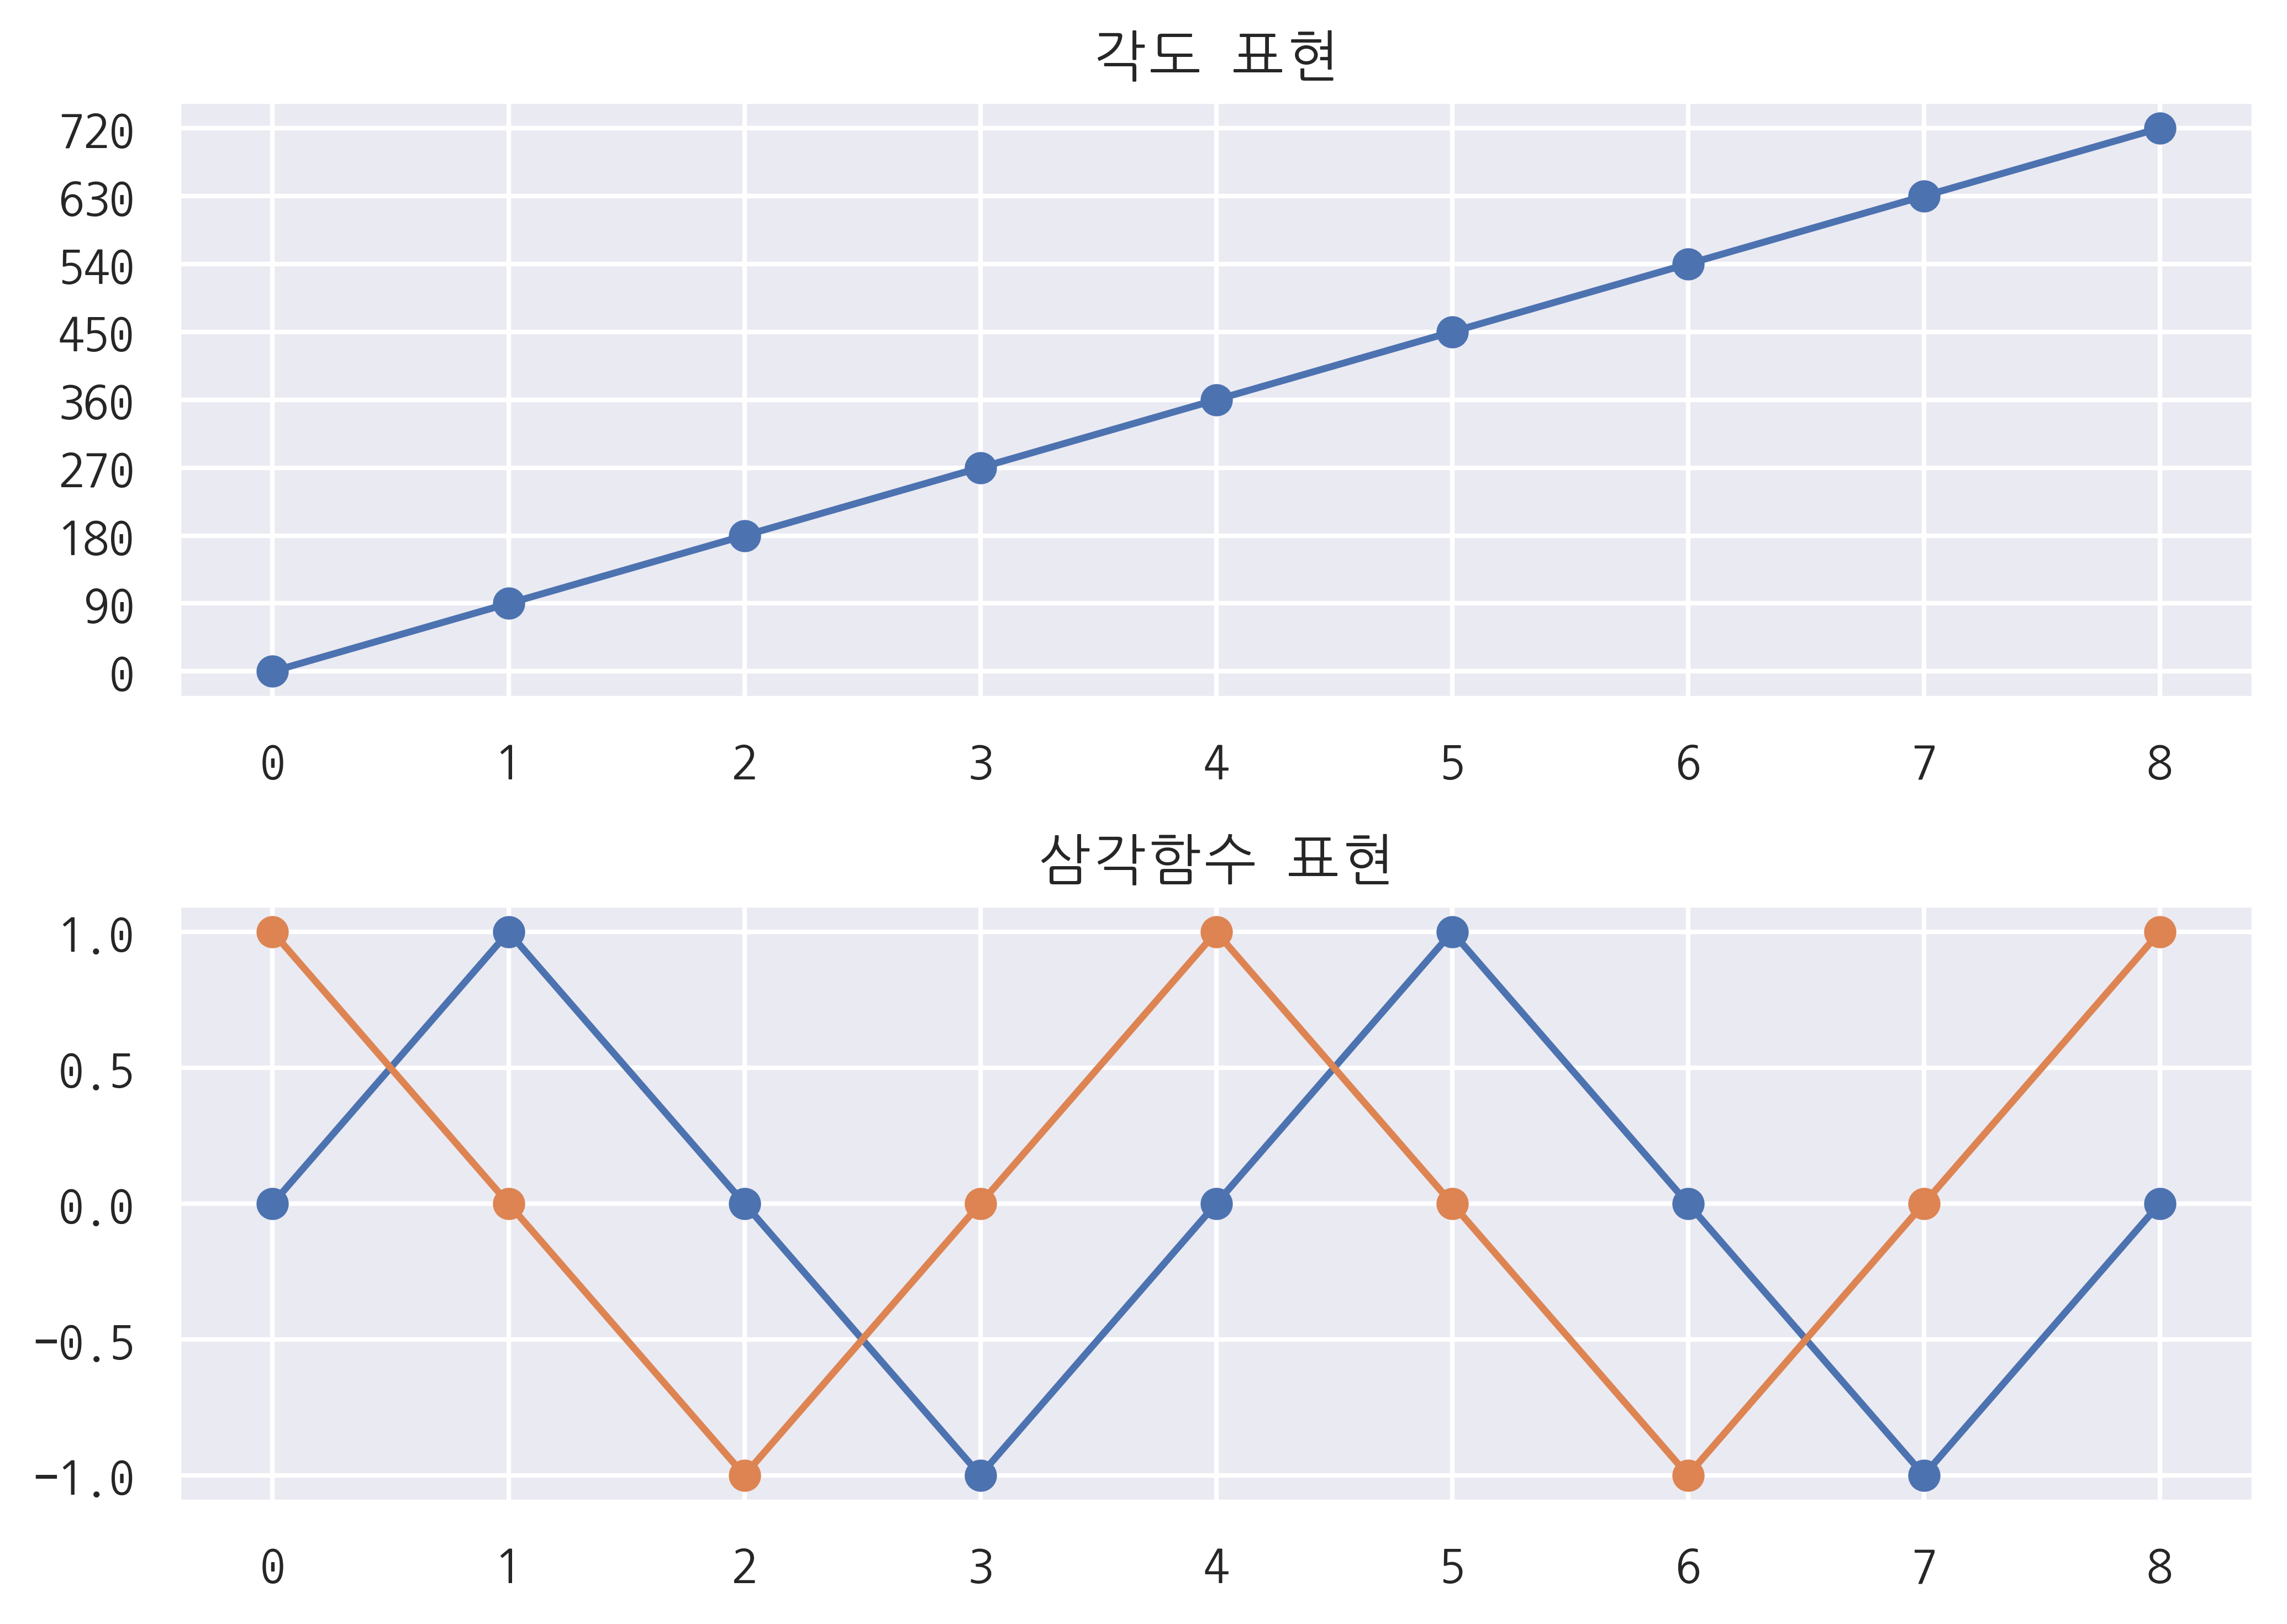

In [110]:
from sklearn.preprocessing import FunctionTransformer

def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0,x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker = 'o')
plt.yticks(X.flatten())
plt.title('각도 표현')
plt.subplot(212)
plt.plot(X2, marker = 'o')
plt.title('삼각함수 표현')
plt.tight_layout()
plt.show()